# Project FIFA MoneyBall

In [ ]:
#Hi TAs, I have decided not to further work on my project and rather go through all other projects to find points
#to improve next time.

# what I would have liked to add:
# contents & better documentation
# visuals
# club rank
# boxplot for narrowing down outliers
# reverse transformation to compare values
# scale values down to K€
# compare different models

## Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import math

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [92]:
data = pd.read_csv(r"Project_FIFA_MoneyBall/Data/fifa21_male2.csv")
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  ...  Standing Tackle  \
0       69        68          68        320          72  ... 

In [93]:
# set pandas option to be able to display all columns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reviewing Data

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


## Cleaning Data

In [95]:
# rename to lower case and replace space with underscore

data.columns = data.columns.str.lower()
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [96]:
# drop columns that cannot be used for analysis
# player_photo, club_logo, flag_photo are links
# there is only one gender so no added information
# loan_date_end are mainly null values or unstructured dates
# position because of several positions per row, we also have the column best position to use for position
# stats per position are dropped for now because I could not find a reason to keep them

data = data.drop(['player_photo', "club_logo", "flag_photo", "gender", "loan_date_end", "position", "team_&_contract", "joined"], axis=1)
data = data.drop(data.loc[:, "ls":"gk"].columns, axis = 1)
data = data.drop(data.loc[:, "height":"weight"].columns, axis = 1)
data = data.drop(data.loc[:, "contract":"sliding_tackle"].columns, axis = 1)
data = data.drop(data.loc[:, "gk_diving":"base_stats"].columns, axis = 1)

In [97]:
# id is unique, so I passed it as the index
data['id'].nunique()
data = data.set_index('id')

In [98]:
# clean up €,K,M formats from value, wage and release_clause column
# data was previously formatted as object, also some values were in M€, K€ and containing "."
# now all columns are in € without characters

def clean_char(x):
    if (x.startswith('€') and x.endswith('K') and (x.find('.')>=0)):
        return x.replace("€","").replace("K","").replace(".","") + "00"      
    elif (x.startswith('€') and x.endswith('K')):
        return x.replace("€","").replace("K","") + "000" 
    if (x.startswith('€') and x.endswith('M') and (x.find('.')>=0)):
        return x.replace("€","").replace("M","").replace(".","") + "00000"      
    elif (x.startswith('€') and x.endswith('M')):
        return x.replace("€","").replace("M","") + "000000" 
    else:
        return x.replace("€","")

data['value'] = pd.to_numeric(data['value'].apply(clean_char))
data['wage'] = pd.to_numeric(data['wage'].apply(clean_char))
data['release_clause'] = pd.to_numeric(data['release_clause'].apply(clean_char))

In [99]:
# clean up K formats from hits column

data['hits'] = data['hits'].apply(lambda x: str(x).replace('.', ''))
data['hits'] = data['hits'].apply(lambda x: float(str(x).replace('K', '00')))

In [122]:
# add a rank per best position and potential

data["bp_pot"] = data.groupby("bp")["pot"].rank("dense", ascending=False)
data["age_pot"] = data.groupby("age")["pot"].rank("dense", ascending=False)

data.head(15)

name  age  ova            nationality               club  bov  \
id                                                                            
2      G. Pasquale   33   69                  Italy            Udinese   71   
16     Luis García   37   71                  Spain          KAS Eupen   70   
27         J. Cole   33   71                England      Coventry City   71   
36        D. Yorke   36   68  Trinidad &amp; Tobago         Sunderland   70   
41         Iniesta   36   81                  Spain        Vissel Kobe   82   
61      D. Odonkor   27   66                Germany   Alemannia Aachen   66   
80    E. Belözoğlu   38   77                 Turkey      Fenerbahçe SK   77   
241       R. Giggs   39   78                  Wales  Manchester United   78   
244  G. Neville  B   35   76                England  Manchester United   78   
246     P. Scholes   37   80                England  Manchester United   82   
249     P. Neville   35   74                England            Everton   75   
250     D. Beckham   37   78                England                UNK   77   
330       R. Keane   35   80    Republic of Ireland          LA Galaxy   81   
388    S. Campbell   35   75                England   Newcastle United   75   
488        O. Kahn   38   87                Germany  FC Bayern München   87   

      bp  pot   foot  growth    value   wage  release_clause  goalkeeping  \
id                                                                          
2    LWB   69   Left       0   625000   7000               0           56   
16    CM   71  Right       0   600000   7000         1100000           56   
27   CAM   71  Right       0  1100000  15000               0           51   
36    ST   82  Right      14        0      0               0           68   
41   CAM   81  Right       0  5500000  12000         7200000           45   
61    RW   70  Right       4   725000   5000               0           46   
80    CM   77   Left       0  2800000  44000         5300000           47   
241  CAM   78   Left       0     1000  60000               0           32   
244   CB   82  Right       6        0      0               0           43   
246  CAM   80  Right       0   400000  40000               0           47   
249   CB   74  Right       0   120000   7000               0           41   
250   CM   78  Right       0        0      0               0           51   
330   CF   80  Right       0  5500000  10000               0           63   
388   CB   79  Right       4        0      0               0           44   
488   GK   90  Right       3        0      0               0          346   

     w/f  sm     a/w     d/w   ir  pac  sho  pas  dri  def  phy   hits  \
id                                                                       
2    3 ★  2★  Medium    High  2 ★   71   59   70   71   68   69    4.0   
16   4 ★  3★  Medium  Medium  1 ★   53   69   73   69   58   63    4.0   
27   4 ★  4★  Medium     Low  2 ★   45   68   76   77   36   52   11.0   
36   3 ★  1★     UNK     UNK  1 ★   61   66   66   69   47   60    3.0   
41   4 ★  4★    High  Medium  4 ★   58   70   85   85   63   59  149.0   
61   2 ★  3★  Medium  Medium  2 ★   91   56   56   67   27   63    7.0   
80   4 ★  4★  Medium  Medium  2 ★   44   71   83   77   62   66    7.0   
241  2 ★  3★  Medium  Medium  3 ★   60   72   85   77   41   57    9.0   
244  3 ★  2★     UNK     UNK  3 ★   67   36   67   53   81   74    4.0   
246  3 ★  3★  Medium  Medium  2 ★   53   76   87   79   59   61    7.0   
249  4 ★  2★  Medium    High  2 ★   51   53   67   62   76   72    7.0   
250  3 ★  2★  Medium  Medium  3 ★   58   71   85   71   52   74   16.0   
330  4 ★  3★    High     Low  2 ★   68   82   75   82   31   69   10.0   
388  3 ★  2★     UNK     UNK  3 ★   65   34   43   48   76   81    3.0   
488  1 ★  1★     UNK     UNK  4 ★   83   88   62   83   60   92    4.0   

     bp_pot  age_pot  value_club  
id                                
2      19.0     22.0        28.

### Deal with null values

In [311]:
# check for null values
# club 23
# joined 58
# volleys
# curve 58
# agility 58
# balance 58
# jumping 58
# interception 7
# positioning 7
# vision 58
# composure 423
# sliding tackle 58
# a/w 89
# d/w 89

#data.isna().sum()

In [15]:
# review pending null values
# club 18 - mix of good retired players and unknown players all with value and wage 0
# composure 365 - fill with ova ?
# a/w 31 - also composure NaN - replace with UNK - all with value and wage 0
# d/w 31 - also composure NaN - replace with UNK - all with value and wage 0

# team & contract = free means not currently with a club

#data[data["composure"].isna()==True]
#data[data['composure'].isna()==False]

In [101]:
# fill null and empty values with "UNK" (solves null values in clolumns club, a/w and d/w)
    
data["club"].fillna("UNK", inplace = True)
data["a/w"].fillna("UNK", inplace = True)
data["d/w"].fillna("UNK", inplace = True)

In [276]:
# all null values have been removed
# data.isna().sum()

In [277]:
# check zeros per column
#data.isin([0]).sum()

In [312]:
# correcting values

# goalkeeper stats have been messed up from my understanding. 
# I individual attributes have been devided by the amount of attribute in the category goalkeeping

#data["goalkeeping"] = data["goalkeeping"]/5

In [102]:
data.shape

(17125, 28)

In [49]:
#data.groupby("bp")["value"].mean().sort_values(ascending=False).head(10)

In [50]:
#data.groupby(['club', 'age']).size().sort_values(ascending=False).head(10)

In [51]:
#data.groupby("club")["age"].mean().sort_values(ascending=True).head(10)

## QUESTION 1 : Does the foot make a difference in other player attributes?

In [17]:
data.groupby('foot').nunique()

name  age  ova  nationality  club  bov  bp  pot  growth  value  wage  \
foot                                                                           
Left    4138   28   45          133   798   44  15   42      25    170   120   
Right  12355   30   49          162   897   49  15   47      27    208   140   

       release_clause  goalkeeping  w/f  sm  a/w  d/w  ir  pac  sho  pas  dri  \
foot                                                                            
Left              770          158    5   5    4    4   5   68   72   62   65   
Right            1130          260    5   5    4    4   5   72   76   68   66   

       def  phy  hits  bp_pot  age_pot  club_value  
foot                                                
Left    75   58   299      39       39          38  
Right   78   65   466      42       39          39

In [18]:
# create foot_data dataframe to work with for this analysis
# add calculated columns to see the difference in number and %

foot_data = data.groupby('foot').mean().T

foot_data["abs_diff"] = round(abs(foot_data["Left"]) - abs(foot_data["Right"]),2)
foot_data["%_diff"] = abs(round(foot_data["abs_diff"] / abs(foot_data["Right"]) * 100, 2))
    
foot_data.T

age        ova        bov        pot    growth         value  \
foot                                                                           
Left      25.063522  67.167575  68.031998  72.687604  5.520028  2.686376e+06   
Right     25.341392  66.898807  67.857121  72.425151  5.526344  2.528476e+06   
abs_diff  -0.280000   0.270000   0.170000   0.260000 -0.010000  1.579003e+05   
%_diff     1.100000   0.400000   0.250000   0.360000  0.180000  6.240000e+00   

                  wage  release_clause  goalkeeping        pac        sho  \
foot                                                                        
Left      10859.824603    4.803878e+06    63.581180  69.240815  53.613890   
Right     10426.065396    4.499444e+06    82.195645  67.715946  55.409732   
abs_diff    433.760000    3.044344e+05   -18.610000   1.520000  -1.800000   
%_diff        4.160000    6.770000e+00    22.640000   2.240000   3.250000   

                pas        dri        def        phy       hits     bp_pot  \
foot                                                                         
Left      59.839298  64.759422  52.475705  64.086750  39.828632  19.036976   
Right     58.628157  64.030219  49.543778  65.180071  33.913451  20.162560   
abs_diff   1.210000   0.730000   2.930000  -1.090000   5.920000  -1.130000   
%_diff     2.060000   1.140000   5.910000   1.670000  17.460000   5.600000   

            age_pot  club_value  
foot                             
Left      18.456743   10.859682  
Right     18.607314   10.906788  
abs_diff  -0.150000   -0.050000  
%_diff     0.810000    0.460000

In [19]:
# create column foot_2 to show which foot is the stronger one for this player attribute
# display the 10 values with the highest difference between both feet (all over 10%) 

conditions = [
    (foot_data["Left"] > foot_data["Right"]),
    (foot_data["Right"] > foot_data["Left"])
]

values = ["left", "right"]

foot_data["foot_2"] = np.select(conditions, values)

foot_data.sort_values(by='%_diff', ascending=False).head(10).T

goalkeeping     hits release_clause        value      def   bp_pot  \
foot                                                                          
Left         63.5812  39.8286    4.80388e+06  2.68638e+06  52.4757   19.037   
Right        82.1956  33.9135    4.49944e+06  2.52848e+06  49.5438  20.1626   
abs_diff      -18.61     5.92         304434       157900     2.93    -1.13   
%_diff         22.64    17.46           6.77         6.24     5.91      5.6   
foot_2         right     left           left         left     left    right   

             wage      sho      pac      pas  
foot                                          
Left      10859.8  53.6139  69.2408  59.8393  
Right     10426.1  55.4097  67.7159  58.6282  
abs_diff   433.76     -1.8     1.52     1.21  
%_diff       4.16     3.25     2.24     2.06  
foot_2       left    right     left     left

## QUESTION 2 : Who are the 5 highest valued players within each each 10 year age groups?

In [20]:
# create top_per_age dataframe to work with for this analysis
# add calculated columns to categorize players in age groups

age_data = data.copy()

conditions = [
    ((age_data["age"] >= 10) & (age_data["age"] < 20)),
    ((age_data["age"] >= 20) & (age_data["age"] < 30)),
    ((age_data["age"] >= 30) & (age_data["age"] < 40)),
    ((age_data["age"] >= 40) & (age_data["age"] < 50)),
    ((age_data["age"] >= 50) & (age_data["age"] < 60))
]

values = ["10-19", "20-29", "30-39", "40-49", "50-60"]

age_data["age_group"] = np.select(conditions, values)

age_data

name  age  ova            nationality           club  bov  \
id                                                                             
2           G. Pasquale   33   69                  Italy        Udinese   71   
16          Luis García   37   71                  Spain      KAS Eupen   70   
27              J. Cole   33   71                England  Coventry City   71   
36             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
41              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                 ...  ...  ...                    ...            ...  ...   
259088       A. Medioub   22   64                 France     CD Tondela   66   
259090       W. Rickard   18   56                  Wales        Burnley   58   
259091       C. Barrett   18   56                England        Burnley   56   
259101   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
259105  Pablo Rodríguez   18   59                  Spain          Lecce   61   

         bp  pot   foot  growth    value   wage  release_clause  goalkeeping  \
id                                                                             
2       LWB   69   Left       0   625000   7000               0           56   
16       CM   71  Right       0   600000   7000         1100000           56   
27      CAM   71  Right       0  1100000  15000               0           51   
36       ST   82  Right      14        0      0               0           68   
41      CAM   81  Right       0  5500000  12000         7200000           45   
...     ...  ...    ...     ...      ...    ...             ...          ...   
259088   CB   69  Right       5   550000   2000               0           39   
259090  CAM   66  Right      10   130000   3000          273000           57   
259091   RB   67  Right      11   130000   2000          273000           40   
259101   RB   73  Right      11   475000   3000          784000           51   
259105   ST   74  Right      15   325000   2000          788000           48   

        w/f  sm     a/w     d/w   ir  pac  sho  pas  dri  def  phy   hits  \
id                                                                          
2       3 ★  2★  Medium    High  2 ★   71   59   70   71   68   69    4.0   
16      4 ★  3★  Medium  Medium  1 ★   53   69   73   69   58   63    4.0   
27      4 ★  4★  Medium     Low  2 ★   45   68   76   77   36   52   11.0   
36      3 ★  1★     UNK     UNK  1 ★   61   66   66   69   47   60    3.0   
41      4 ★  4★    High  Medium  4 ★   58   70   85   85   63   59  149.0   
...     ...  ..     ...     ...  ...  ...  ...  ...  ...  ...  ...    ...   
259088  2 ★  2★  Medium  Medium  1 ★   54   30   37   48   64   69    5.0   
259090  3 ★  2★  Medium  Medium  1 ★   62   46   57   56   43   55    5.0   
259091  3 ★  2★  Medium  Medium  1 ★   63   35   44   52   54   55    3.0   
259101  4 ★  2★    High  Medium  1 ★   71   34   58   59   59   54    5.0   
259105  3 ★  3★    High  Medium  1 ★   70   62   41   57   16   49    4.0   

        bp_pot  age_pot  club_value age_group  
id                                             
2         19.0     22.0        28.0     30-39  
16        21.0     15.0        14.0     30-39  
27        22.0     20.0         5.0     30-39  
36        12.0      2.0        31.0     30-39  
41        12.0      3.0         1.0     30-39  
...        ...      ...         ...       ...  
259088    24.0     22.0        13.0     20-29  
259090    27.0     24.0        29.0     10-19  
259091    23.0     23.0        29.0     10-19  
259101    17.0     20.0        13.0     20-29  
259105    20.0     16.0        15.0     10-19  

[17125 rows x 30 columns]

In [21]:
# downsize dataframe for easier display options

age_data = age_data[["age_group","age","name", "club", "bp", "value","pot", "hits", "bp_pot", "age_pot"]]
age_data = age_data.groupby(["age_group"])
age_data

In [22]:
age_data_2= age_data.apply(lambda x: x.sort_values(by="value", ascending=False))

In [23]:
age_data_2

age_group  age           name                    club   bp  \
age_group id                                                                  
10-19     239085     10-19   19     E. Haaland       Borussia Dortmund   ST   
          238794     10-19   19   Vinícius Jr.             Real Madrid   RM   
          234396     10-19   19      A. Davies       FC Bayern München   LB   
          243812     10-19   19        Rodrygo             Real Madrid   RM   
          253004     10-19   17      Ansu Fati            FC Barcelona   LW   
...                    ...  ...            ...                     ...  ...   
40-49     136553     40-49   41  Lee Dong Gook  Jeonbuk Hyundai Motors   ST   
          135708     40-49   42      C. Blanco            Club América  CAM   
          1109       40-49   40     P. Maldini                   Milan   CB   
          113524     40-49   40           Nino                Elche CF   ST   
50-60     254704     50-60   53       K. Miura             Yokohama FC   CF   

                     value  pot    hits  bp_pot  age_pot  
age_group id                                              
10-19     239085  45000000   92  3800.0     2.0      2.0  
          238794  27500000   93   100.0     1.0      1.0  
          234396  22500000   89   200.0     1.0      4.0  
          243812  21000000   90   821.0     3.0      3.0  
          253004  15000000   90  2800.0     2.0      1.0  
...                    ...  ...     ...     ...      ...  
40-49     136553         0   69    22.0    25.0      2.0  
          135708         0   71     6.0    22.0      5.0  
          1109           0   89    10.0     4.0      1.0  
          113524         0   70    21.0    24.0      6.0  
50-60     254704         0   59   279.0    27.0      1.0  

[17125 rows x 10 columns]

In [24]:
age_data_3=age_data_2.reset_index(drop=True)
age_data_3.groupby('age_group').head(5)

age_group  age            name                    club   bp      value  \
0         10-19   19      E. Haaland       Borussia Dortmund   ST   45000000   
1         10-19   19    Vinícius Jr.             Real Madrid   RM   27500000   
2         10-19   19       A. Davies       FC Bayern München   LB   22500000   
3         10-19   19         Rodrygo             Real Madrid   RM   21000000   
4         10-19   17       Ansu Fati            FC Barcelona   LW   15000000   
2007      20-29   21       K. Mbappé     Paris Saint-Germain   ST  105500000   
2008      20-29   28       Neymar Jr     Paris Saint-Germain   LW   90000000   
2009      20-29   29    K. De Bruyne         Manchester City  CAM   87000000   
2010      20-29   28         S. Mané               Liverpool   LW   78000000   
2011      20-29   28        M. Salah               Liverpool   RW   78000000   
13512     30-39   31  R. Lewandowski       FC Bayern München   ST   80000000   
13513     30-39   33        L. Messi            FC Barcelona   RW   67500000   
13514     30-39   30        T. Kroos             Real Madrid   CM   55000000   
13515     30-39   32      K. Benzema             Real Madrid   CF   53000000   
13516     30-39   32       S. Agüero         Manchester City   ST   53000000   
17083     40-49   42       G. Buffon                Juventus   GK    2200000   
17084     40-49   42    M. Schwarzer          Leicester City   GK     500000   
17085     40-49   40        S. Given              Stoke City   GK     500000   
17086     40-49   40      S. Torrico  San Lorenzo de Almagro   GK     400000   
17087     40-49   41       Cifuentes                Cádiz CF   GK     400000   
17124     50-60   53        K. Miura             Yokohama FC   CF          0   

       pot    hits  bp_pot  age_pot  
0       92  3800.0     2.0      2.0  
1       93   100.0     1.0      1.0  
2       89   200.0     1.0      4.0  
3       90   821.0     3.0      3.0  
4       90  2800.0     2.0      1.0  
2007    95  1200.0     1.0      1.0  
2008    91   546.0     1.0      2.0  
2009    91   406.0     2.0      1.0  
2010    90   374.0     2.0      3.0  
2011    90   382.0     2.0      3.0  
13512   91   487.0     3.0      1.0  
13513   93   830.0     1.0      1.0  
13514   88   214.0     4.0      1.0  
13515   89   434.0     2.0      2.0  
13516   89   220.0     5.0      2.0  
17083   82   154.0    12.0      1.0  
17084   73     3.0    21.0      3.0  
17085   73     7.0    21.0      4.0  
17086   73     5.0    21.0      4.0  
17087   73     9.0    21.0      1.0  
17124   59   279.0    27.0      1.0

## QUESTION 3 : Who are the highest valued players per best position? (most expensive team)

In [25]:
bp_value = data.copy()

In [26]:
# downsize dataframe for easier display options

bp_value = bp_value[["bp", "value", "pot", "age","name", "club", "hits", "bp_pot", "age_pot"]]
bp_value = bp_value.groupby(["bp"])
bp_value

In [27]:
bp_value_2 = bp_value.apply(lambda x: x.sort_values(by="value", ascending=False))

In [28]:
bp_value_3=bp_value_2.reset_index(drop=True)
bp_value_3.groupby('bp').head(1)

bp      value  pot  age                 name                 club  \
0      CAM   87000000   91   29         K. De Bruyne      Manchester City   
2246    CB   75500000   91   28          V. van Dijk            Liverpool   
5498   CDM   65000000   90   25           J. Kimmich    FC Bayern München   
6744    CF   53000000   89   32           K. Benzema          Real Madrid   
6833    CM   55000000   88   30             T. Kroos          Real Madrid   
7823    GK   75000000   93   27             J. Oblak      Atlético Madrid   
9399    LB   53000000   89   26         A. Robertson            Liverpool   
10320   LM   52500000   87   27               H. Son    Tottenham Hotspur   
11125   LW   90000000   91   28            Neymar Jr  Paris Saint-Germain   
11334  LWB   35500000   88   24             Grimaldo           SL Benfica   
11586   RB   60000000   92   21  T. Alexander-Arnold            Liverpool   
12480   RM   53000000   91   22          M. Rashford    Manchester United   
13884   RW   78000000   90   28             M. Salah            Liverpool   
14213  RWB   29500000   88   32              P. Lahm    FC Bayern München   
14465   ST  105500000   95   21            K. Mbappé  Paris Saint-Germain   

         hits  bp_pot  age_pot  
0       406.0     2.0      1.0  
2246    413.0     2.0      2.0  
5498    777.0     1.0      1.0  
6744    434.0     2.0      2.0  
6833    214.0     4.0      1.0  
7823    220.0     1.0      1.0  
9399    456.0     1.0      3.0  
10320   508.0     4.0      4.0  
11125   546.0     1.0      2.0  
11334   655.0     1.0      3.0  
11586   100.0     1.0      3.0  
12480   100.0     2.0      1.0  
13884   382.0     2.0      3.0  
14213    13.0     1.0      3.0  
14465  1200.0     1.0      1.0

## EDA

In [103]:
# create dataframe I want to use for my model

# as Abhi suggested I will create a very simple model with only attributes and go from there

dfp = data.copy()
dfp = dfp.drop(dfp.loc[:, "nationality":"club"].columns, axis = 1)
dfp = dfp.drop(['name', "foot", "bp_pot", "age_pot"], axis=1)

# review selected data

dfp.head(1).T

id                   2
age                 33
ova                 69
bov                 71
bp                 LWB
pot                 69
growth               0
value           625000
wage              7000
release_clause       0
goalkeeping         56
w/f                3 ★
sm                  2★
a/w             Medium
d/w               High
ir                 2 ★
pac                 71
sho                 59
pas                 70
dri                 71
def                 68
phy                 69
hits                 4

In [104]:
# review stats

dfp.describe().apply(lambda x: round(x,2)) 

age       ova       bov       pot    growth         value  \
count  17125.00  17125.00  17125.00  17125.00  17125.00  1.712500e+04   
mean      25.27     66.97     67.90     72.49      5.52  2.567377e+06   
std        4.94      6.86      6.64      5.77      5.79  5.372622e+06   
min       16.00     38.00     42.00     47.00     -1.00  0.000000e+00   
25%       21.00     62.00     64.00     69.00      0.00  3.750000e+05   
50%       25.00     67.00     68.00     72.00      4.00  8.000000e+05   
75%       29.00     72.00     72.00     76.00      9.00  2.400000e+06   
max       53.00     93.00     93.00     95.00     26.00  1.055000e+08   

            wage  release_clause  goalkeeping       pac       sho       pas  \
count   17125.00    1.712500e+04     17125.00  17125.00  17125.00  17125.00   
mean    10532.93    4.574445e+06        77.61     68.09     54.97     58.93   
std     21145.38    1.033846e+07        81.14     11.15     13.88     10.19   
min         0.00    0.000000e+00         5.00     25.00     16.00     25.00   
25%      1000.00    5.080000e+05        48.00     62.00     46.00     52.00   
50%      3000.00    1.300000e+06        53.00     69.00     58.00     60.00   
75%     11000.00    3.900000e+06        59.00     75.00     65.00     66.00   
max    560000.00    2.031000e+08       440.00     96.00     93.00     93.00   

            dri       def       phy      hits  
count  17125.00  17125.00  17125.00  17125.00  
mean      64.21     50.27     64.91     35.37  
std        9.83     16.85      9.66    158.41  
min       28.00     12.00     27.00      3.00  
25%       59.00     35.00     59.00      4.00  
50%       65.00     53.00     66.00      7.00  
75%       71.00     64.00     72.00     18.00  
max       95.00     91.00     93.00   9200.00

In [105]:
#create correlation matrix

# use correlation matrix to only pick attributes with high correlation (over 0,5) with value
# bov, pot, wage, release_clause, reactions, base_stats

dfp_matrix = dfp.corr()
dfp_matrix

age       ova       bov       pot    growth     value  \
age             1.000000  0.517099  0.456734 -0.237619 -0.850204  0.095981   
ova             0.517099  1.000000  0.985877  0.592268 -0.595585  0.631679   
bov             0.456734  0.985877  1.000000  0.628323 -0.542890  0.640818   
pot            -0.237619  0.592268  0.628323  1.000000  0.294499  0.563570   
growth         -0.850204 -0.595585 -0.542890  0.294499  1.000000 -0.187347   
value           0.095981  0.631679  0.640818  0.563570 -0.187347  1.000000   
wage            0.200851  0.592925  0.592453  0.462235 -0.242411  0.822728   
release_clause  0.075386  0.597617  0.608384  0.549201 -0.161274  0.979295   
goalkeeping     0.125933  0.038222 -0.008702 -0.007277 -0.052589  0.002641   
pac            -0.177291  0.201319  0.212889  0.259294  0.019730  0.210809   
sho             0.309438  0.487060  0.478573  0.244481 -0.333941  0.323770   
pas             0.396082  0.699229  0.689975  0.395773 -0.434753  0.444484   
dri             0.241027  0.643427  0.640746  0.445004 -0.319487  0.442156   
def             0.223184  0.344906  0.349906  0.170562 -0.239034  0.172856   
phy             0.436462  0.543354  0.535579  0.159959 -0.484974  0.266541   
hits           -0.079690  0.239555  0.255477  0.347990  0.062807  0.402927   

                    wage  release_clause  goalkeeping       pac       sho  \
age             0.200851        0.075386     0.125933 -0.177291  0.309438   
ova             0.592925        0.597617     0.038222  0.201319  0.487060   
bov             0.592453        0.608384    -0.008702  0.212889  0.478573   
pot             0.462235        0.549201    -0.007277  0.259294  0.244481   
growth         -0.242411       -0.161274    -0.052589  0.019730 -0.333941   
value           0.822728        0.979295     0.002641  0.210809  0.323770   
wage            1.000000        0.798432    -0.011207  0.122591  0.294205   
release_clause  0.798432        1.000000     0.004279  0.200583  0.300981   
goalkeeping    -0.011207        0.004279     1.000000 -0.002572  0.248762   
pac             0.122591        0.200583    -0.002572  1.000000  0.305392   
sho             0.294205        0.300981     0.248762  0.305392  1.000000   
pas             0.419563        0.418093     0.172027  0.248176  0.658508   
dri             0.389842        0.416343     0.161038  0.521642  0.765627   
def             0.191576        0.167362    -0.203839 -0.253257 -0.416957   
phy             0.260983        0.250809     0.061890 -0.126338  0.051973   
hits            0.302218        0.410376    -0.031584  0.129575  0.122878   

                     pas       dri       def       phy      hits  
age             0.396082  0.241027  0.223184  0.436462 -0.079690  
ova             0.699229  0.643427  0.344906  0.543354  0.239555  
bov             0.689975  0.640746  0.349906  0.535579  0.255477  
pot             0.395773  0.445004  0.170562  0.159959  0.347990  
growth         -0.434753 -0.319487 -0.239034 -0.484974  0.062807  
value           0.444484  0.442156  0.172856  0.266541  0.402927  
wage            0.419563  0.389842  0.191576  0.260983  0.302218  
release_clause  0.418093  0.416343  0.167362  0.250809  0.410376  
goalkeeping     0.172027  0.161038 -0.203839  0.061890 -0.031584  
pac             0.248176  0.521642 -0.253257 -0.126338  0.129575  
sho             0.658508  0.765627 -0.416957  0.051973  0.122878  
pas             1.000000  0.823216  0.142314  0.172751  0.162474  
dri             0.823216  1.000000 -0.153362  0.024540  0.193827  
def             0.142314 -0.153362  1.000000  0.513218  0.040482  
phy             0.172751  0.024540  0.513218  1.000000  0.069655  
hits            0.162474  0.193827  0.040482  0.069655  1.000000

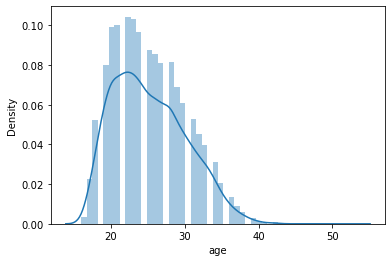

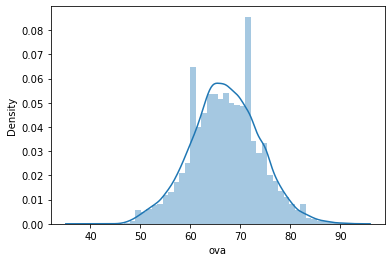

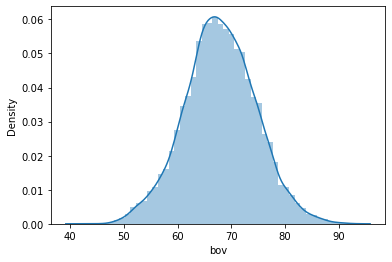

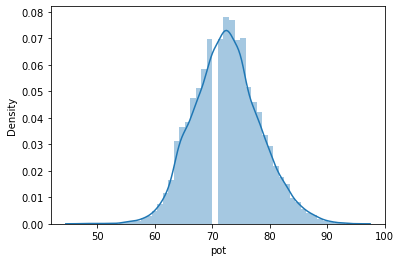

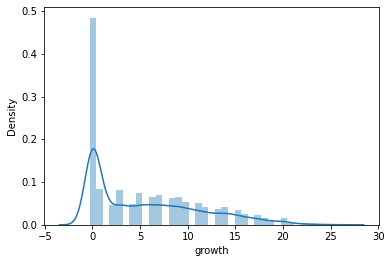

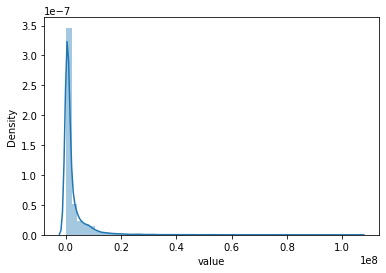

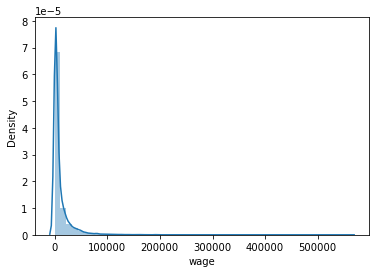

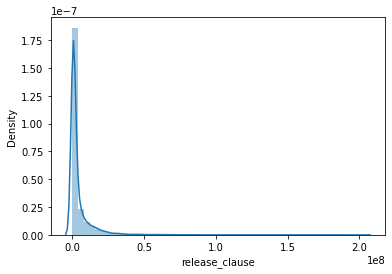

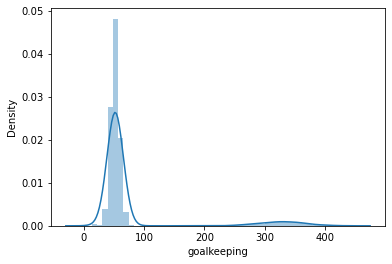

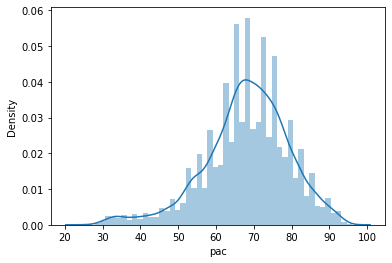

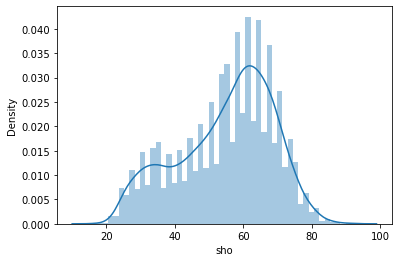

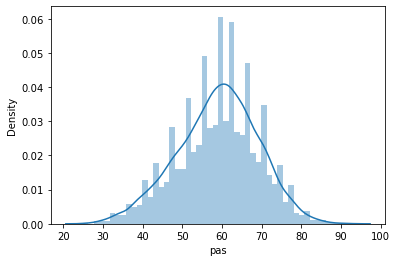

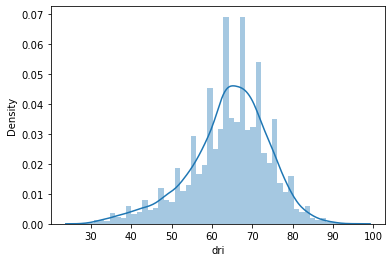

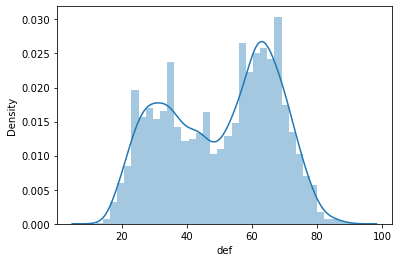

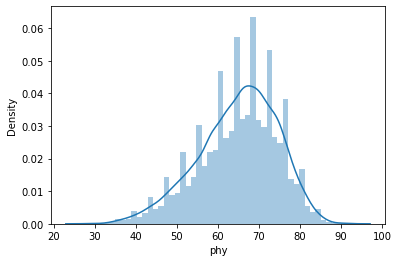

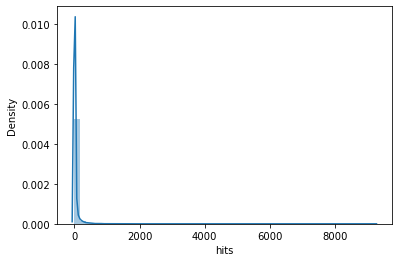

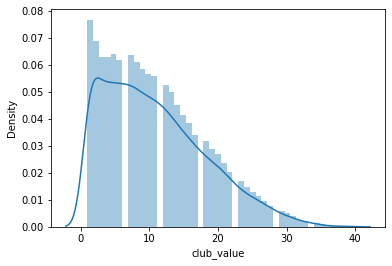

In [32]:
for column in dfp.select_dtypes(np.number).columns:
    sns.distplot(dfp[column])
    plt.show()

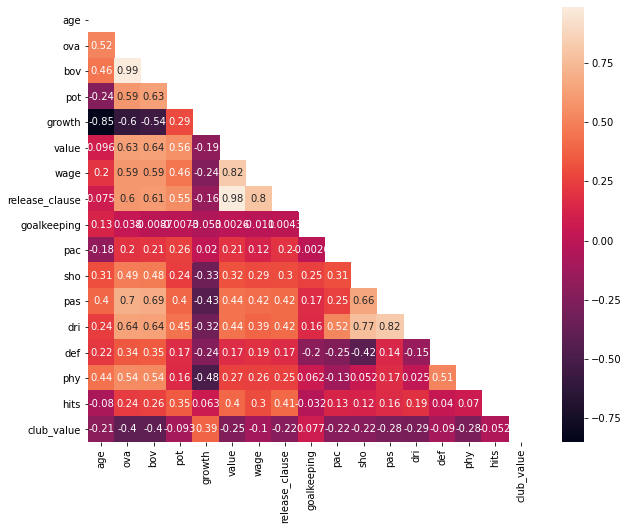

In [33]:
# check the correlations
mask = np.zeros_like(dfp.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(dfp.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

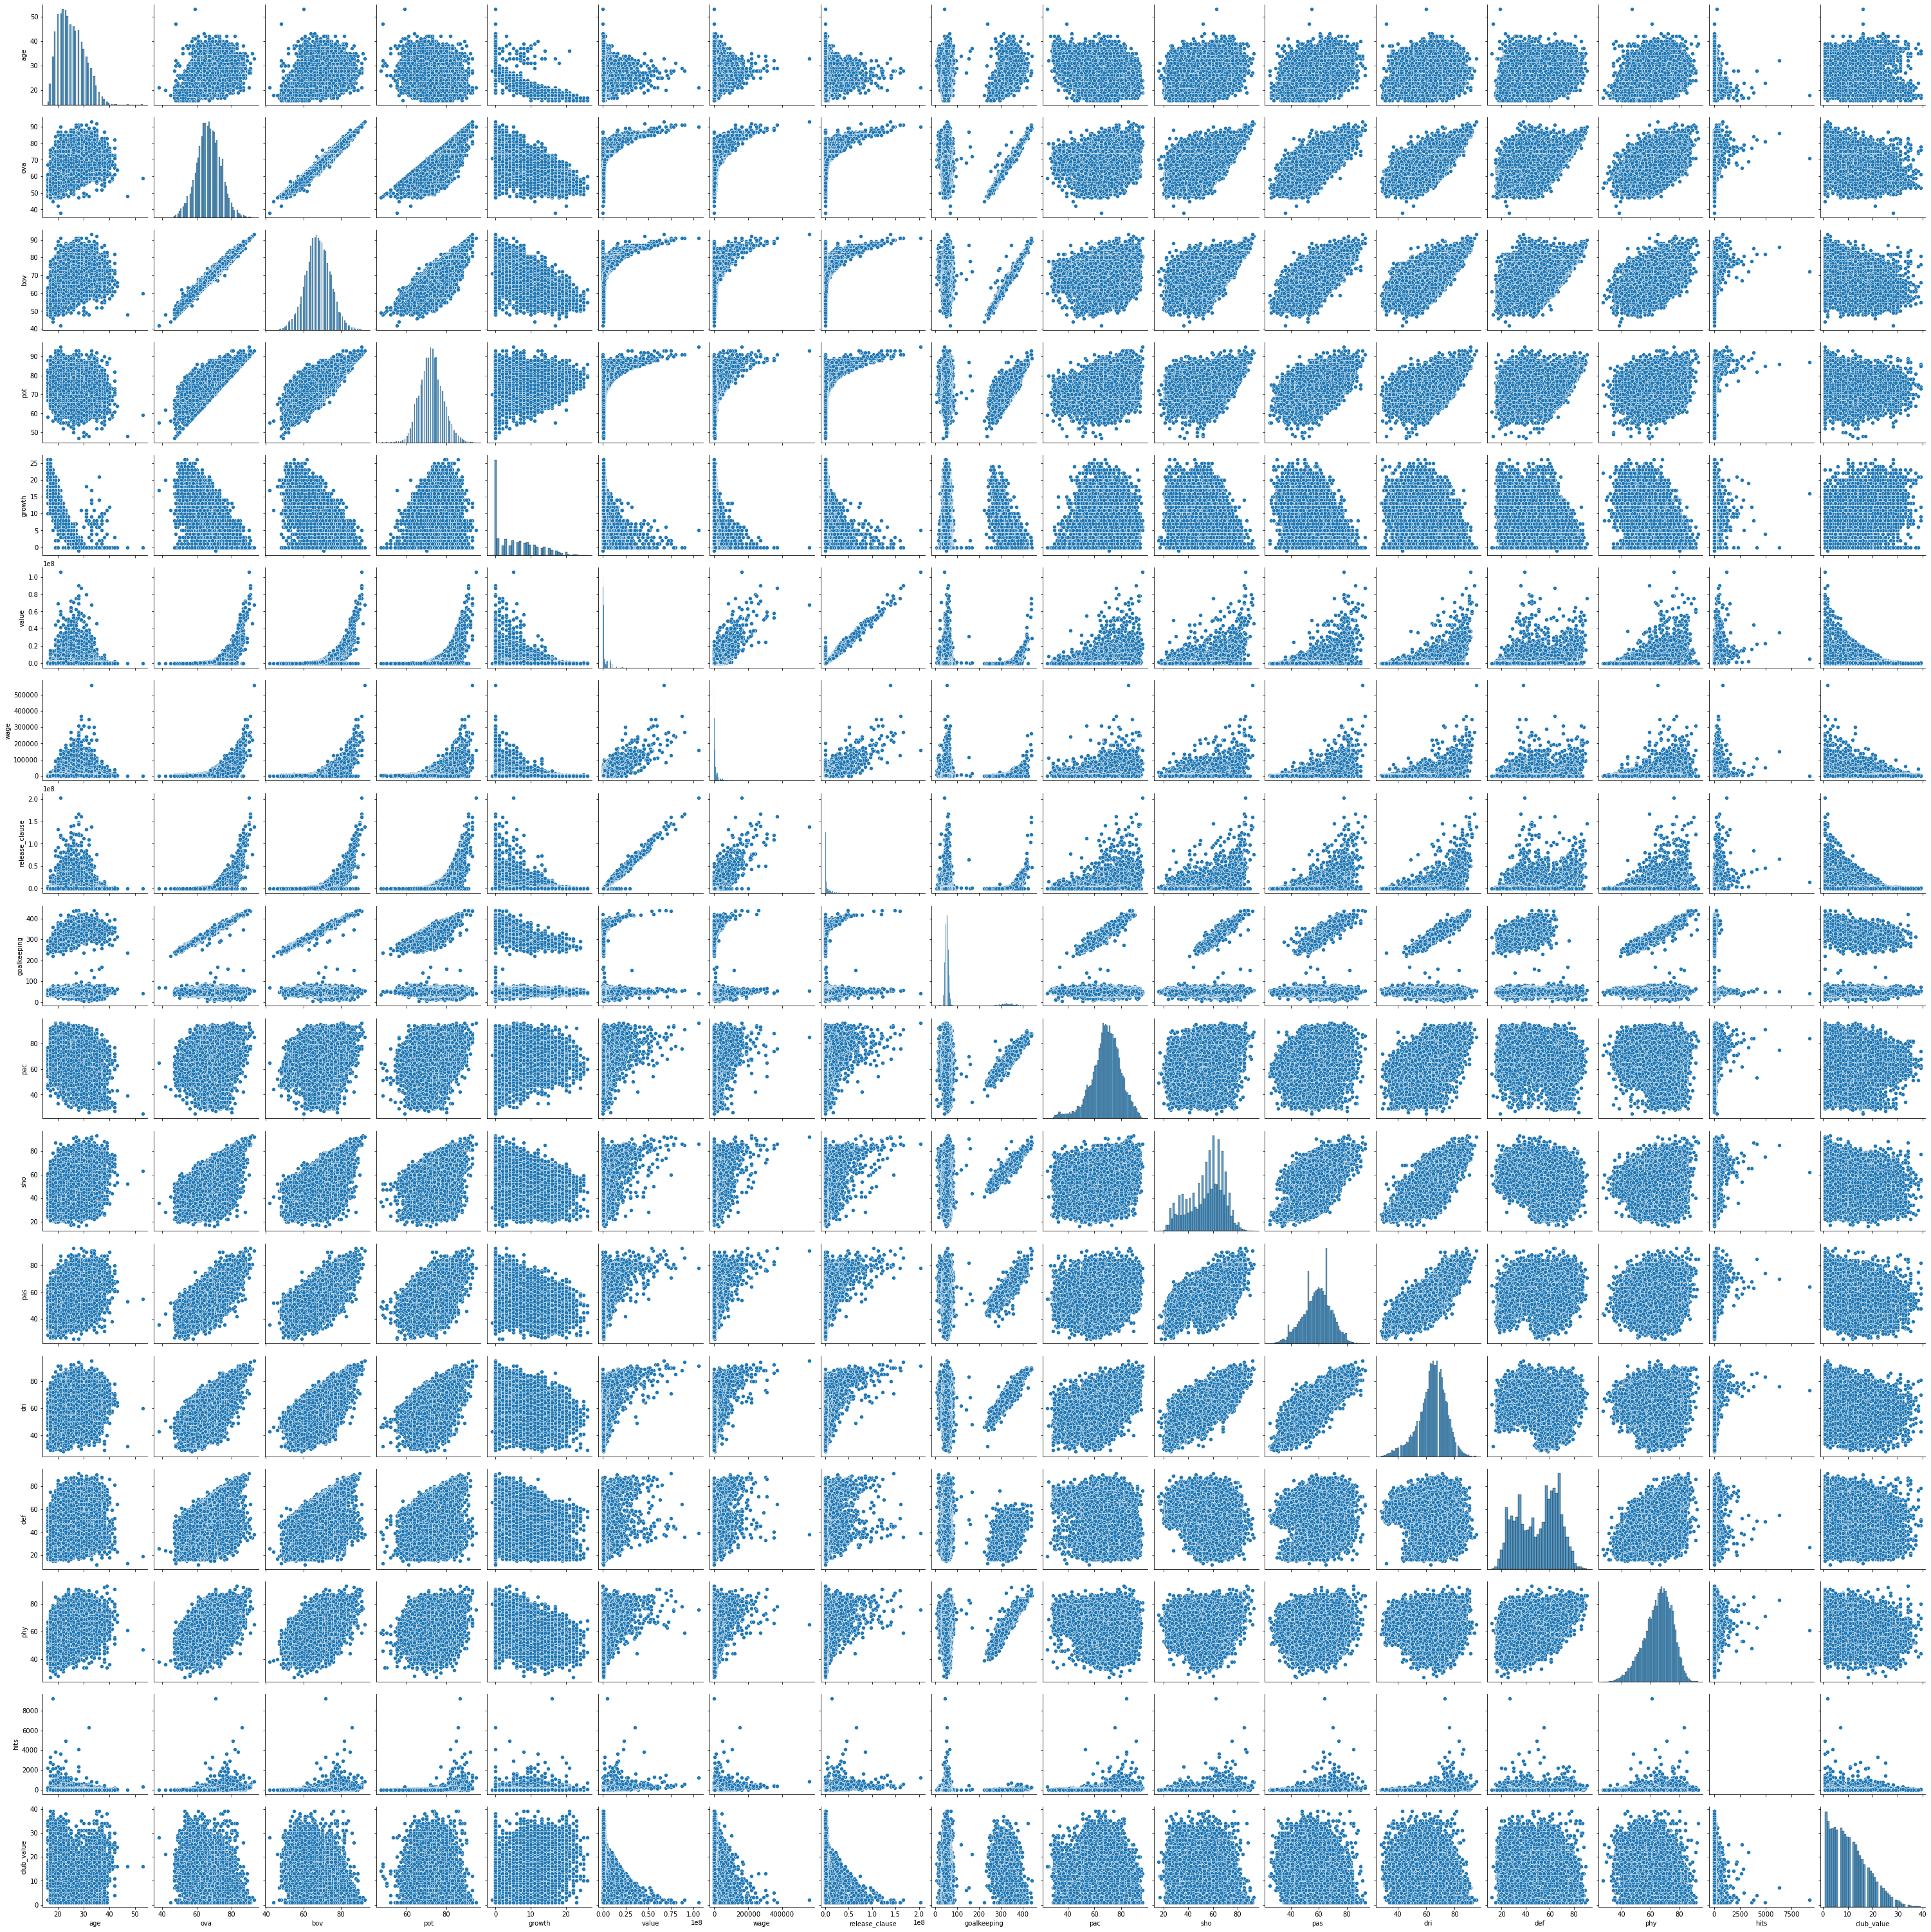

In [34]:
# covariance visualization
sns.pairplot(dfp)

## Feature Engineering

In [106]:
def boxcox_transform(dfp):
    numeric_cols = dfp.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        dfp[column] = np.where(dfp[column]<=0, np.NAN, dfp[column]) 
        dfp[column] = dfp[column].fillna(dfp[column].mean())
        transformed_data, ci = stats.boxcox(dfp[column])
        dfp[column] = transformed_data
        _ci[column] = [ci] 
    return dfp, _ci

In [107]:
dfp, _ci = boxcox_transform(dfp)
dfp

age        ova        bov   bp        pot    growth      value  \
id                                                                            
2       2.333615  58.848889  56.738223  LWB  13.172802  4.584237   9.129377   
16      2.380795  60.507424  55.975537   CM  13.376923  4.584237   9.111273   
27      2.333615  60.507424  56.738223  CAM  13.376923  4.584237   9.375507   
36      2.369619  58.018831  55.975537   ST  14.448024  7.071382   9.739965   
41      2.369619  68.770363  65.084741  CAM  14.353973  4.584237  10.031482   
...          ...        ...        ...  ...        ...       ...        ...   
259088  2.155150  54.693131  52.917746   CB  13.172802  2.854077   9.072533   
259090  2.059924  48.013556  46.765866  CAM  12.860569  5.370950   8.399457   
259091  2.059924  48.013556  45.219710   RB  12.965478  5.815220   8.399457   
259101  2.110516  53.026877  49.848127   RB  13.577977  5.815220   9.006795   
259105  2.059924  50.523026  49.078782   ST  13.677395  7.468786   8.833871   

            wage  release_clause  goalkeeping  w/f  sm     a/w     d/w   ir  \
id                                                                            
2       6.244139       11.122483     1.028941  3 ★  2★  Medium    High  2 ★   
16      6.244139       10.330780     1.028941  4 ★  3★  Medium  Medium  1 ★   
27      6.594838       11.122483     1.026811  4 ★  4★  Medium     Low  2 ★   
36      6.446415       11.122483     1.032801  3 ★  1★     UNK     UNK  1 ★   
41      6.494475       11.292245     1.023647  4 ★  4★    High  Medium  4 ★   
...          ...             ...          ...  ...  ..     ...     ...  ...   
259088  5.616544       11.122483     1.019538  2 ★  2★  Medium  Medium  1 ★   
259090  5.826947        9.563051     1.029323  3 ★  2★  Medium  Medium  1 ★   
259091  5.616544        9.563051     1.020306  3 ★  2★  Medium  Medium  1 ★   
259101  5.826947       10.148631     1.026811  4 ★  2★    High  Medium  1 ★   
259105  5.616544       10.151389     1.025326  3 ★  3★    High  Medium  1 ★   

                pac         sho         pas          dri        def  \
id                                                                    
2       2463.742155  453.868664  283.726599  4182.873266  75.923321   
16      1375.061893  584.977081  301.077674  3935.403734  64.221941   
27       992.112263  571.299910  318.724409  4973.603546  38.771068   
36      1820.130636  544.317993  261.064613  3935.403734  51.439501   
41      1645.953772  598.777474  373.371302  6141.736449  70.063815   
...             ...         ...         ...          ...        ...   
259088  1427.299498  151.443339  114.974132  1813.764877  71.234349   
259090  1880.129283  303.144517  212.146912  2520.474283  46.818187   
259091  1941.097618  194.543759  147.015544  2151.709982  59.562112   
259101  2463.742155  185.597137  217.435144  2817.458611  65.388839   
259105  2395.019557  491.864041  133.005193  2617.517379  16.161376   

                phy      hits  
id                             
2       2907.224432  0.993444  
16      2411.757129  0.993444  
27      1626.147109  1.382620  
36      2181.787768  0.840787  
41      2107.755587  1.805955  
...             ...       ...  
259088  2907.224432  1.097335  
259090  1824.716668  1.097335  
259091  1824.716668  0.840787  
259101  1757.223252  1.097335  
259105  1439.289713  0.993444  

[17125 rows x 22 columns]

In [108]:
_ci

{'age': [-0.2492783223122066],
 'ova': [0.9559340098746975],
 'bov': [0.9363406018152075],
 'pot': [0.462816532335289],
 'growth': [0.6548833329051343],
 'value': [-0.06101848053221857],
 'wage': [-0.08407080625511924],
 'release_clause': [-0.04513159710135626],
 'goalkeeping': [-0.9507096124936394],
 'pac': [1.9939997884121137],
 'sho': [1.6188391610102983],
 'pas': [1.411050191226924],
 'dri': [2.1340803849866448],
 'def': [1.0379326390198405],
 'phy': [2.0534811965548743],
 'hits': [-0.5107327666073309]}

In [109]:
#removing outliers

def remove_outliers(dfp, threshold=1.5, in_columns=dfp.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(dfp[column],75)
            lower = np.percentile(dfp[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            dfp = dfp[(dfp[column]>lower_limit) & (dfp[column]<upper_limit)]
    return dfp

In [110]:
#boxplot and skipping columns missing

In [111]:
# encoding categorical

dfp = pd.get_dummies(dfp, drop_first=True)
dfp

age        ova        bov        pot    growth      value  \
id                                                                       
2       2.333615  58.848889  56.738223  13.172802  4.584237   9.129377   
16      2.380795  60.507424  55.975537  13.376923  4.584237   9.111273   
27      2.333615  60.507424  56.738223  13.376923  4.584237   9.375507   
36      2.369619  58.018831  55.975537  14.448024  7.071382   9.739965   
41      2.369619  68.770363  65.084741  14.353973  4.584237  10.031482   
...          ...        ...        ...        ...       ...        ...   
259088  2.155150  54.693131  52.917746  13.172802  2.854077   9.072533   
259090  2.059924  48.013556  46.765866  12.860569  5.370950   8.399457   
259091  2.059924  48.013556  45.219710  12.965478  5.815220   8.399457   
259101  2.110516  53.026877  49.848127  13.577977  5.815220   9.006795   
259105  2.059924  50.523026  49.078782  13.677395  7.468786   8.833871   

            wage  release_clause  goalkeeping          pac         sho  \
id                                                                       
2       6.244139       11.122483     1.028941  2463.742155  453.868664   
16      6.244139       10.330780     1.028941  1375.061893  584.977081   
27      6.594838       11.122483     1.026811   992.112263  571.299910   
36      6.446415       11.122483     1.032801  1820.130636  544.317993   
41      6.494475       11.292245     1.023647  1645.953772  598.777474   
...          ...             ...          ...          ...         ...   
259088  5.616544       11.122483     1.019538  1427.299498  151.443339   
259090  5.826947        9.563051     1.029323  1880.129283  303.144517   
259091  5.616544        9.563051     1.020306  1941.097618  194.543759   
259101  5.826947       10.148631     1.026811  2463.742155  185.597137   
259105  5.616544       10.151389     1.025326  2395.019557  491.864041   

               pas          dri        def          phy      hits  bp_CB  \
id                                                                         
2       283.726599  4182.873266  75.923321  2907.224432  0.993444      0   
16      301.077674  3935.403734  64.221941  2411.757129  0.993444      0   
27      318.724409  4973.603546  38.771068  1626.147109  1.382620      0   
36      261.064613  3935.403734  51.439501  2181.787768  0.840787      0   
41      373.371302  6141.736449  70.063815  2107.755587  1.805955      0   
...            ...          ...        ...          ...       ...    ...   
259088  114.974132  1813.764877  71.234349  2907.224432  1.097335      1   
259090  212.146912  2520.474283  46.818187  1824.716668  1.097335      0   
259091  147.015544  2151.709982  59.562112  1824.716668  0.840787      0   
259101  217.435144  2817.458611  65.388839  1757.223252  1.097335      0   
259105  133.005193  2617.517379  16.161376  1439.289713  0.993444      0   

        bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
id                                                                        
2            0      0      0      0      0      0      0       1      0   
16           0      0      1      0      0      0      0       0      0   
27           0      0      0      0      0      0      0       0      0   
36           0      0      0      0      0      0      0       0      0   
41           0      0      0      0      0      0      0       0      0   
...        ...    ...    ...    ...    ...    ...    ...     ...    ...   
259088       0      0      0      0      0      0      0       0      0   
259090       0      0      0      0      0      0      0       0      0   
259091       0      0      0      0      0      0      0       0      1   
259101       0      0      0      0      0      0      0       0      1   
259105       0      0      0      0      0      0      0       0      0   

        bp_RM  bp_RW  bp_RWB  bp_ST  w/f_2 ★  w/f_3 ★  w/f_4 ★  w/f_5 ★  \
id                                             

In [112]:
# x/y split for our model data

X = dfp.drop('value', axis=1)
y = dfp['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Analyzing Results

In [114]:
predictions = model.predict(X_test)

In [115]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9386408105684106, 0.07782085012838134, 0.14155401690440775)

In [116]:
model.coef_

array([-1.46033068e+00,  7.12665713e-02,  4.83065021e-03, -6.00719904e-02,
       -3.94444940e-03,  4.06705109e-02,  2.84796480e-01,  8.60472769e-01,
        7.48565834e-06, -4.37983188e-05, -8.18478062e-05, -5.16882427e-06,
       -1.09339655e-04,  1.18432915e-05,  4.81452386e-02, -4.14534355e-02,
       -1.35719459e-02,  1.01204198e-02,  7.67638102e-03, -1.26586995e-02,
       -3.34297940e-02,  4.78301747e-03,  4.54095560e-03, -6.68417273e-02,
       -3.72512170e-02,  3.02079564e-03, -1.11955330e-02, -2.32046980e-02,
       -1.19346374e-03,  2.42835159e-02,  1.90811760e-02,  2.39386427e-02,
        2.11497369e-02,  5.53434379e-02,  6.91379186e-02,  8.00182071e-02,
        9.21388351e-02, -1.90816145e-02, -7.63880251e-03,  1.42281435e-01,
       -4.05088071e-03, -2.28721422e-03,  1.42281435e-01, -4.43878118e-02,
       -1.44508081e-01, -2.60411055e-01, -3.02086383e-01])

In [117]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [118]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(2665984.949425452, 6784830.2818612885)

In [119]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true          pred          resid
id                                            
226711   600000.0  5.183846e+05   81615.428229
246118  1200000.0  1.425914e+06  225913.507126
259091   130000.0  1.623685e+05   32368.471926
223241  3000000.0  2.452175e+06  547825.079981
255800    80000.0  9.331510e+04   13315.096004
...           ...           ...            ...
206529  1400000.0  1.393671e+06    6328.525272
193561  1900000.0  1.527217e+06  372782.505046
212934   900000.0  1.097073e+06  197073.457962
252796   450000.0  4.241375e+05   25862.539576
257298   250000.0  2.693084e+05   19308.389657

[5138 rows x 3 columns]

In [120]:
results.describe()

true          pred         resid
count  5.138000e+03  5.138000e+03  5.138000e+03
mean   2.652915e+06  2.665994e+06  5.471143e+05
std    5.130428e+06  6.239714e+06  1.977213e+06
min    1.000000e+03  1.386327e+04  2.955005e+01
25%    4.250000e+05  4.216052e+05  2.774209e+04
50%    8.750000e+05  9.047272e+05  8.945543e+04
75%    2.637769e+06  2.414127e+06  4.225167e+05
max    7.800000e+07  1.290601e+08  5.804550e+07